<a href="https://colab.research.google.com/github/YoanaKC/The-eagles/blob/main/Mid_term.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1.** Installing necessary libraries

In [ ]:
!pip install tensorflow tensorflow-datasets tensorflow-hub matplotlib

**Step 2.** Importing required libraries:



In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np

**Step 3.** Loading the Oxford-IIIT Pet Dataset:

In [ ]:
(train_ds, test_ds), ds_info = tfds.load(
    'oxford_iiit_pet:4.0.0', # Changed the version to 4.0.0
    split=['train', 'test'],
    with_info=True,
    shuffle_files=True
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/incomplete.U0C70W_4.0.0/oxford_iiit_pet-train.tfrecord*...…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/oxford_iiit_pet/incomplete.U0C70W_4.0.0/oxford_iiit_pet-test.tfrecord*...:…

Dataset oxford_iiit_pet downloaded and prepared to /root/tensorflow_datasets/oxford_iiit_pet/4.0.0. Subsequent calls will reuse this data.


**Step 4.** Exploring the Dataset

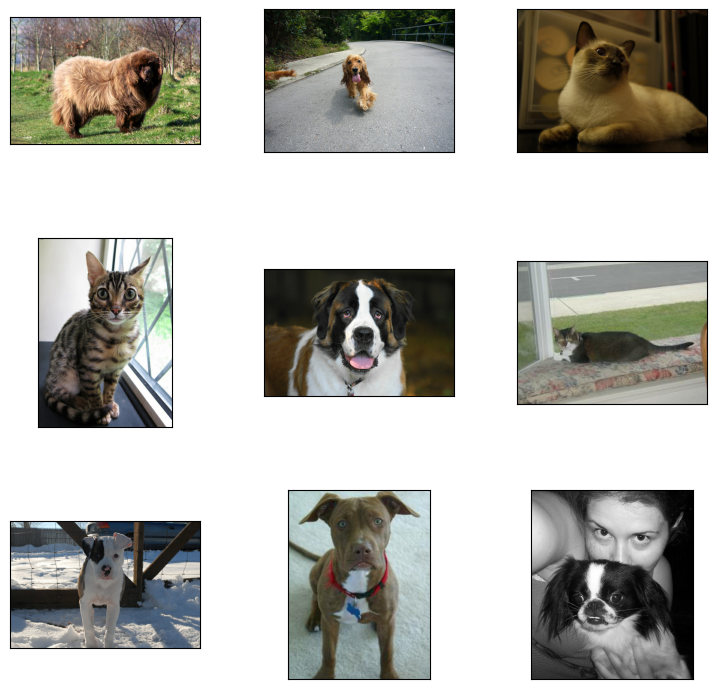

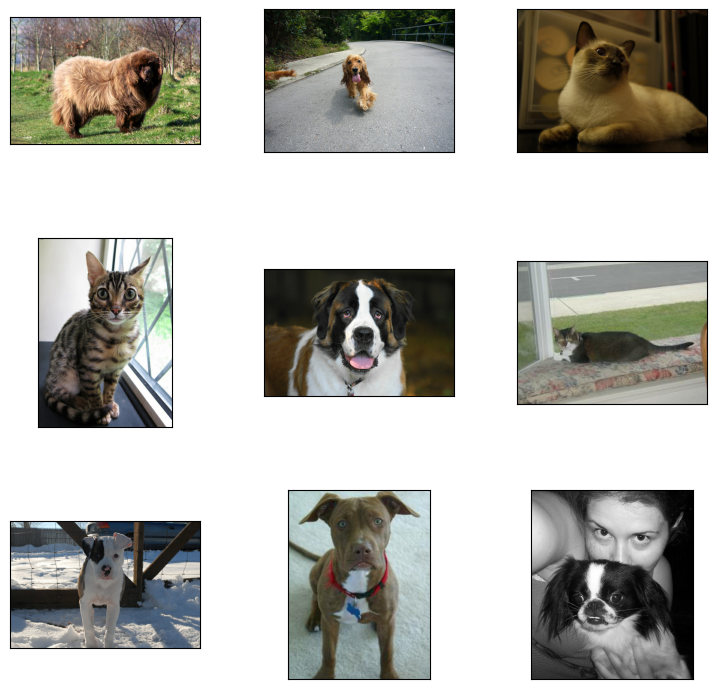

In [ ]:
tfds.show_examples(train_ds, ds_info, image_key='image')


**Step 5.** Check the number of classes and image sizes

In [ ]:
print(ds_info.features['label'].num_classes)
print(ds_info.features['image'].shape)

37
(None, None, 3)


**Step 6.** Data Cleaning

In [ ]:
IMG_SIZE = 224
def preprocess(data):
    image = data['image']
    image = tf.image.resize(image, (224, 224))
    image = image / 255.0  # Normalize to [0, 1]
    return image, data['label']

train_ds = train_ds.map(preprocess)
test_ds = test_ds.map(preprocess)

**Step 7**. Data Augmentation

In [ ]:
def augment(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_contrast(image, lower=0.5, upper=1.5)
    return image, label

train_ds = train_ds.map(augment)

**Step 8.** Batch and Shuffle the Data

In [ ]:
BATCH_SIZE = 32
train_ds = train_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

**Step 9.**Loading a Pre-trained Model

In [ ]:
model_url = "https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2"
hub_layer = hub.KerasLayer(model_url, input_shape=(IMG_SIZE, IMG_SIZE, 3))

**Step 10.** Fine-Tune the Model:

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

# Load dataset info
ds_name = "oxford_iiit_pet:4.0.0"  # Change this to the actual dataset name
ds_info = tfds.builder(ds_name).info

# Extract number of classes
num_classes = ds_info.features['label'].num_classes

# Define image size
IMG_SIZE = 224  # Ensure this matches the model's expected input size

# Load pre-trained model from TensorFlow Hub
model_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/classification/5"

# Define the Keras model correctly
base_model = hub.KerasLayer(model_url, trainable=False)

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),  # Explicit input layer
    tf.keras.layers.Lambda(lambda x: base_model(x)),  # Wrap hub layer in Lambda
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# # Define Keras Model
# base_model = tf.keras.Sequential([
#     hub.KerasLayer(model_url, input_shape=(IMG_SIZE, IMG_SIZE, 3), trainable=False),
#     tf.keras.layers.Dense(num_classes, activation='softmax')
# ])

# Display model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                      │ (None, 1001)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 37)                  │          37,074 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,074 (144.82 KB)

 Trainable params: 37,074 (144.82 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np

# **Step 3.** Loading the Oxford-IIIT Pet Dataset:
(train_ds, test_ds), ds_info = tfds.load(
    'oxford_iiit_pet:4.0.0', # Changed the version to 4.0.0
    split=['train', 'test'],
    with_info=True,
    shuffle_files=True
)

# **Step 10.** Fine-Tune the Model:
model_url = "https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2" # Define model_url here
IMG_SIZE = 224 # Define IMG_SIZE here

num_classes = ds_info.features['label'].num_classes # Now ds_info is available

base_model = hub.KerasLayer(model_url, trainable=False)

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(model_url, input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub

# Load the Oxford-IIIT Pet dataset
(train_ds, test_ds), ds_info = tfds.load(
    'oxford_iiit_pet:4.0.0',
    split=['train', 'test'],
    with_info=True,
    shuffle_files=True
)

# Load SSD MobileNet V2 from TensorFlow Hub
model_url = "https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2"
base_model = hub.load(model_url)  # Use hub.load() instead of hub.KerasLayer

# Function to make predictions using the pre-trained model
def detect_objects(image):
    image = tf.image.resize(image, (224, 224))  # Resize to match model input
    image = tf.cast(image, tf.uint8)  # Ensure data type is uint8
    image = tf.expand_dims(image, axis=0)  # Add batch dimension

    # Use the pre-trained model for prediction
    output = base_model(image)

    return output

# Example: Using the first image from the dataset for detection
for example in train_ds.take(1):
    image = example["image"]
    detections = detect_objects(image)
    print(detections)  # Output includes bounding boxes and labels


{'raw_detection_boxes': <tf.Tensor: shape=(1, 1917, 4), dtype=float32, numpy=
array([[[-0.00581827,  0.00761422,  0.04505705,  0.05594356],
        [-0.01538279, -0.06650062,  0.07669759,  0.16076376],
        [-0.06174022, -0.02748131,  0.18338484,  0.09292824],
        ...,
        [ 0.2252042 ,  0.03838876,  0.8081    ,  0.95989394],
        [ 0.07335314,  0.2147617 ,  0.98696053,  0.7809011 ],
        [ 0.25695077,  0.17716455,  0.9653834 ,  0.8358375 ]]],
      dtype=float32)>, 'detection_multiclass_scores': <tf.Tensor: shape=(1, 100, 91), dtype=float32, numpy=
array([[[0.00488118, 0.06407278, 0.0164747 , ..., 0.07028895,
         0.01266023, 0.00835689],
        [0.00474731, 0.0385132 , 0.0322628 , ..., 0.10307646,
         0.0098985 , 0.00885313],
        [0.00474731, 0.0385132 , 0.0322628 , ..., 0.10307646,
         0.0098985 , 0.00885313],
        ...,
        [0.00567415, 0.0375727 , 0.03651423, ..., 0.09863201,
         0.02159028, 0.01712959],
        [0.0027658 , 0.0320457